In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
print(train_data.shape)
train_data.head(10)

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
train_data.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = train_data.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
test_data.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = test_data.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [9]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000
mean,28.846175,218.017302,455.474858,174.483644,300.306705,298.981617
std,14.489030,636.332116,1629.771293,566.368468,1111.190882,1121.607795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,42.000000,65.000000,25.000000,54.000000,41.750000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [10]:
train_data[train_data.duplicated()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [11]:
# (train_data['HomePlanet'].isna() & train_data['Destination'].isna()).sum()

<AxesSubplot:>

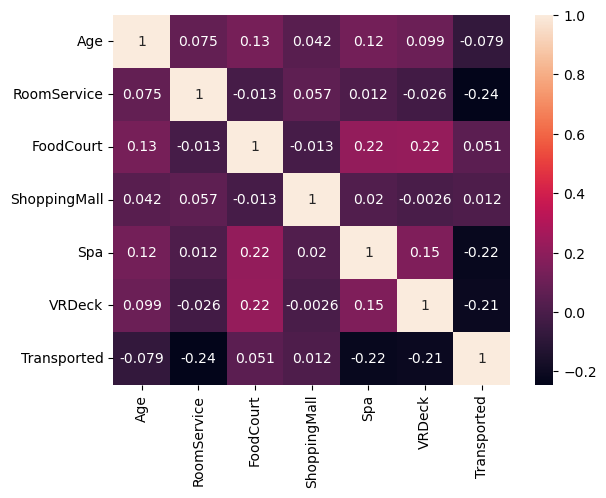

In [12]:
# plt.figure(figsize=(12,12))
sns.heatmap(data=train_data.corr(), annot=True)

In [13]:
train_data[train_data['Age'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [14]:
train_data['HomePlanet'].value_counts()

Earth     4021
Europa    1848
Mars      1529
Name: HomePlanet, dtype: int64

<BarContainer object of 3 artists>

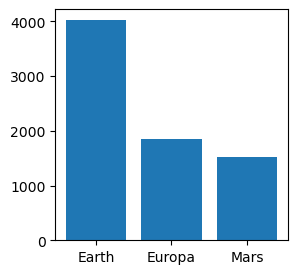

In [15]:
plt.figure(figsize=(3,3))
# fig, ax = plt.subplots(figsize=(3,4))
plt.bar(train_data['HomePlanet'].value_counts().index, train_data['HomePlanet'].value_counts().values)

<AxesSubplot:xlabel='Destination', ylabel='Count'>

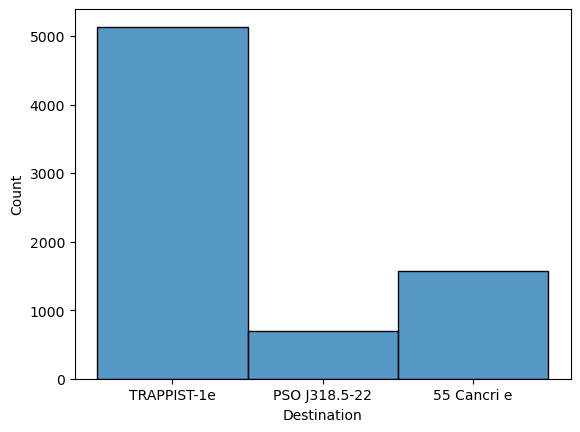

In [16]:
# sns.set_style(rc=)
sns.histplot(data=train_data, x='Destination')
# plt.show()

In [17]:
le = LabelEncoder()
train_data['HomePlanetCode'] = le.fit_transform(train_data['HomePlanet'])
train_data['DestinationCode'] = le.fit_transform(train_data['Destination'])
test_data['HomePlanetCode'] = le.fit_transform(test_data['HomePlanet'])
test_data['DestinationCode'] = le.fit_transform(test_data['Destination'])

In [18]:
train_data['HomePlanetCode'].value_counts()

0    4021
1    1848
2    1529
Name: HomePlanetCode, dtype: int64

In [19]:
train_data['DestinationCode'].value_counts()

2    5135
0    1566
1     697
Name: DestinationCode, dtype: int64

In [20]:
train_data[train_data['HomePlanet'].isna()].loc[:,['HomePlanet','Destination','Transported']]

,HomePlanet,Destination,Transported


In [21]:
train_data[train_data['Destination'].isna()].loc[:,['HomePlanet','Destination','Transported']]

,HomePlanet,Destination,Transported


In [22]:
train_data['CryoSleepCode'] = le.fit_transform(train_data['CryoSleep'])
test_data['CryoSleepCode'] = le.fit_transform(test_data['CryoSleep'])

In [23]:
test_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanetCode,DestinationCode,CryoSleepCode
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,2,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,2,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,0,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,2,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,2,0
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks,0,2,0
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,0.0,0.0,0.0,0.0,Aldah Ainserfle,1,0,1
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry,1,2,1
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry,1,0,1
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson,0,0,0


In [24]:
train_data[['CabinDeck','CabinNum','CabinSide']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['CabinDeck','CabinNum','CabinSide']] = test_data['Cabin'].str.split('/', expand=True)

In [25]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanetCode,DestinationCode,CryoSleepCode,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,2,0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,2,0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,2,0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,2,0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,2,0,F,1,S


In [26]:
train_data[train_data.CabinDeck.isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanetCode,DestinationCode,CryoSleepCode,CabinDeck,CabinNum,CabinSide


In [27]:
train_data['CabinDeck'].value_counts()

F    2425
G    2226
E     758
B     691
C     653
D     422
A     221
T       2
Name: CabinDeck, dtype: int64

In [28]:
# train_data['CabinDeckCode'] = le.fit_transform(train_data['CabinDeck'])
# test_data['CabinDeckCode'] = le.fit_transform(test_data['CabinDeck'])

train_CabinDeck_encoded = pd.get_dummies(train_data['CabinDeck'], prefix='CabinDeck')
test_CabinDeck_encoded = pd.get_dummies(test_data['CabinDeck'], prefix='CabinDeck')

train_CabinDeck_encoded
# train_data['CabinDeckCode'].value_counts()

,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
8688,1,0,0,0,0,0,0,0
8689,0,0,0,0,0,0,1,0
8690,0,0,0,0,0,0,1,0
8691,0,0,0,0,1,0,0,0


In [29]:
train_data['CabinSideCode'] = le.fit_transform(train_data['CabinSide'])
test_data['CabinSideCode'] = le.fit_transform(test_data['CabinSide'])
train_data['CabinSideCode'].value_counts()

1    3731
0    3667
Name: CabinSideCode, dtype: int64

In [30]:
train_data['TransportedCode'] = le.fit_transform(train_data['Transported'])
train_data.head()
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanetCode,DestinationCode,CryoSleepCode,CabinDeck,CabinNum,CabinSide,CabinSideCode
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,2,1,G,3,S,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,2,0,F,4,S,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,0,1,C,0,S,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,2,0,C,1,S,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,2,0,F,5,S,1


In [31]:
train_data['VIPCode'] = le.fit_transform(train_data['VIP'])
test_data['VIPCode'] = le.fit_transform(test_data['VIP'])
train_data['VIPCode'].value_counts()

0    7219
1     179
Name: VIPCode, dtype: int64

In [32]:
train_data.Age.fillna(train_data.Age.mean(), inplace=True)
test_data.Age.fillna(test_data.Age.mean(), inplace=True)
train_data.Age.isna().sum()
test_data.Age.isna().sum()

0

<AxesSubplot:>

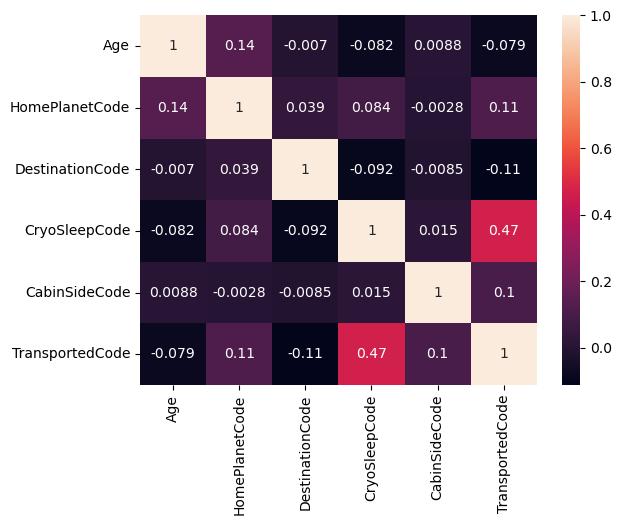

In [33]:
sns.heatmap(data=train_data[['Age','HomePlanetCode','DestinationCode','CryoSleepCode','CabinSideCode','TransportedCode']].corr(), annot=True)

<AxesSubplot:>

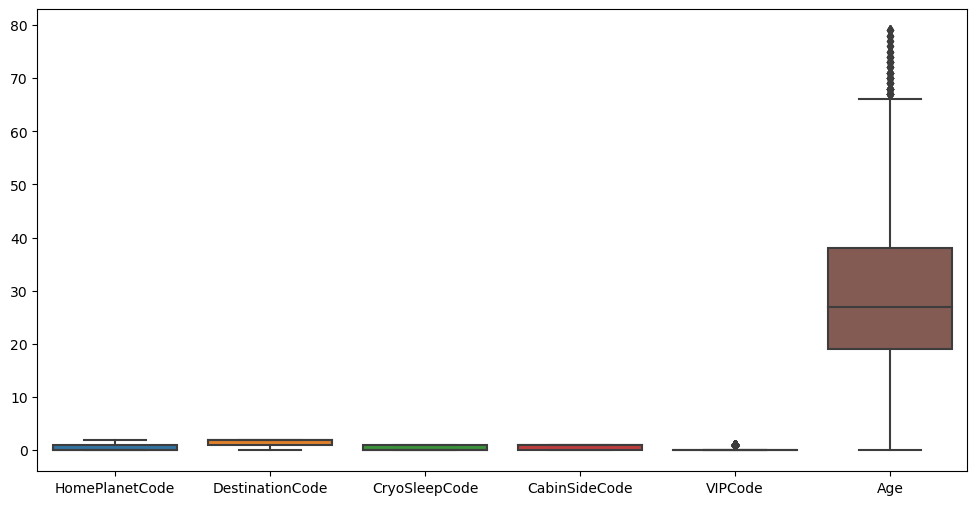

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_data[['HomePlanetCode','DestinationCode','CryoSleepCode','CabinSideCode','VIPCode','Age']])

<AxesSubplot:>

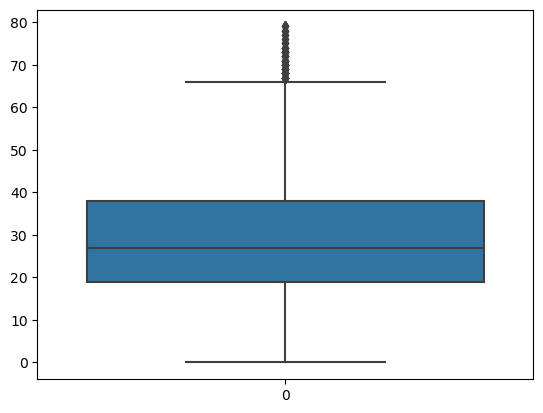

In [35]:
sns.boxplot(data=train_data['Age'])

In [36]:
train_data['HomePlanet'].value_counts()

Earth     4021
Europa    1848
Mars      1529
Name: HomePlanet, dtype: int64

In [37]:
train_data[['PassengerGroup','PassengerNum']] = train_data['PassengerId'].str.split('_', expand = True)
test_data[['PassengerGroup','PassengerNum']] = test_data['PassengerId'].str.split('_', expand = True)
train_data.head()
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,HomePlanetCode,DestinationCode,CryoSleepCode,CabinDeck,CabinNum,CabinSide,CabinSideCode,VIPCode,PassengerGroup,PassengerNum
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,0,2,1,G,3,S,1,0,0013,01
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,0,2,0,F,4,S,1,0,0018,01
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,1,0,1,C,0,S,1,0,0019,01
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,1,2,0,C,1,S,1,0,0021,01
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,0,2,0,F,5,S,1,0,0023,01


In [38]:
train_data[['PassengerGroup','PassengerNum']] = train_data[['PassengerGroup','PassengerNum']].apply(pd.to_numeric)
test_data[['PassengerGroup','PassengerNum']] = test_data[['PassengerGroup','PassengerNum']].apply(pd.to_numeric)

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      7398 non-null   object 
 1   HomePlanet       7398 non-null   object 
 2   CryoSleep        7398 non-null   object 
 3   Cabin            7398 non-null   object 
 4   Destination      7398 non-null   object 
 5   Age              7398 non-null   float64
 6   VIP              7398 non-null   object 
 7   RoomService      7398 non-null   float64
 8   FoodCourt        7398 non-null   float64
 9   ShoppingMall     7398 non-null   float64
 10  Spa              7398 non-null   float64
 11  VRDeck           7398 non-null   float64
 12  Name             7398 non-null   object 
 13  Transported      7398 non-null   bool   
 14  HomePlanetCode   7398 non-null   int64  
 15  DestinationCode  7398 non-null   int64  
 16  CryoSleepCode    7398 non-null   int64  
 17  CabinDeck     

<AxesSubplot:xlabel='PassengerGroup'>

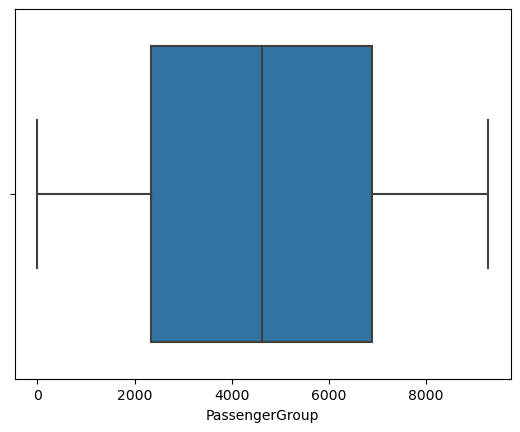

In [40]:
sns.boxplot(data=train_data, x='PassengerGroup')

<AxesSubplot:xlabel='PassengerGroup', ylabel='Count'>

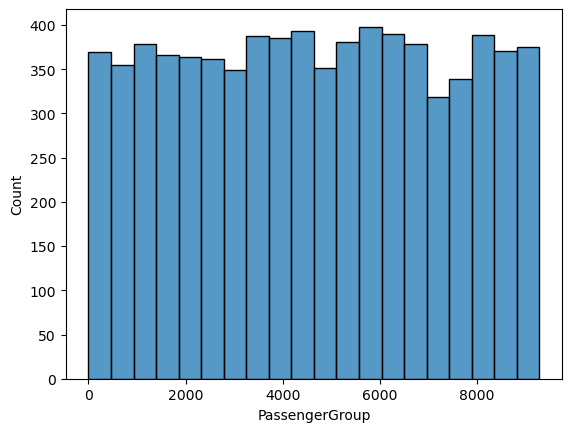

In [41]:
sns.histplot(data=train_data, x='PassengerGroup')

In [42]:
train_data.PassengerGroup.value_counts()

4256    8
8796    8
4498    8
378     7
6334    7
       ..
3468    1
3467    1
3465    1
3461    1
4623    1
Name: PassengerGroup, Length: 5507, dtype: int64

**Defining the feature set**

In [43]:
# features = ['HomePlanetCode','DestinationCode',
#             'CryoSleepCode',
# #             'CabinDeckCode',
#             'CabinSideCode',
#             'VIPCode',
#             'Age',
#             'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'
#            ]

# X = pd.concat([train_data[features], train_CabinDeck_encoded], axis=1)
# y = train_data['TransportedCode']

# X_test = pd.concat([test_data[features], test_CabinDeck_encoded], axis=1)

# X

In [44]:
features = ['HomePlanet','Destination',
            'CryoSleepCode',
            'CabinDeck',
            'CabinSide',
            'VIPCode',
            'Age',
            'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'
           ]

X = pd.get_dummies(train_data[features])

# X = pd.concat([train_data[features], train_CabinDeck_encoded], axis=1)
y = train_data['TransportedCode']

X_test = pd.get_dummies(test_data[features])

X_test

,CryoSleepCode,VIPCode,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,1,0,27.000000,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,19.000000,0.0,9.0,0.0,2823.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,31.000000,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,38.000000,0.0,6652.0,0.0,181.0,585.0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,0,20.000000,10.0,0.0,635.0,0.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,0,34.000000,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1
4273,0,0,42.000000,0.0,847.0,17.0,10.0,144.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4274,1,0,28.658146,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
4275,0,0,28.658146,0.0,2680.0,0.0,0.0,523.0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [45]:
X

,CryoSleepCode,VIPCode,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,0,0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,0,24.0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,1,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,0,16.0,303.0,70.0,151.0,565.0,2.0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,1,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,...,1,0,0,0,0,0,0,0,1,0
8689,1,0,18.0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1
8690,0,0,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1
8691,0,0,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,...,0,0,0,0,1,0,0,0,0,1


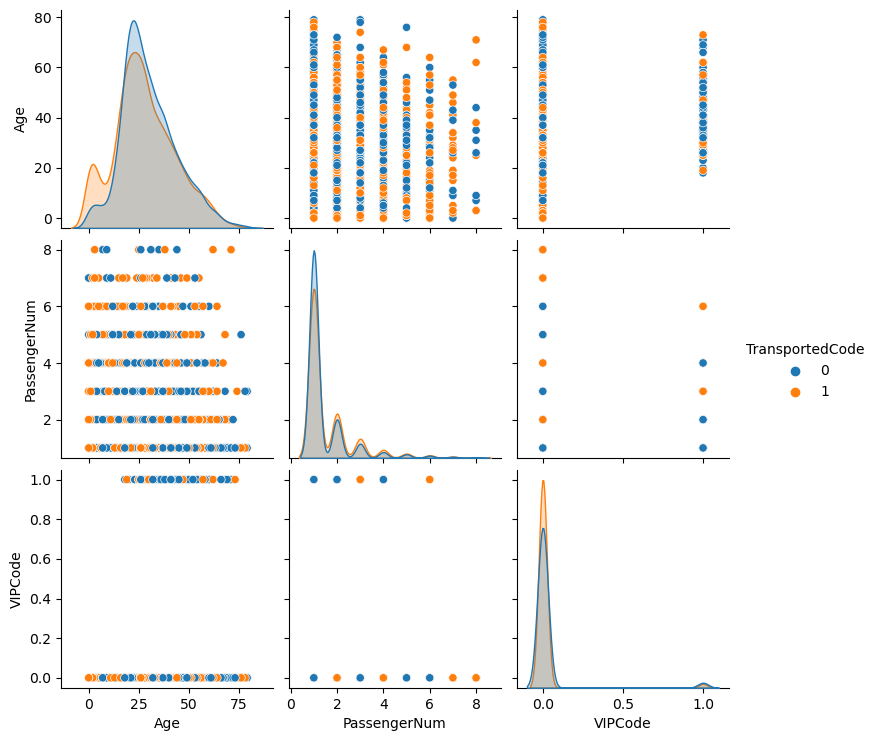

In [46]:
sns.pairplot(data=train_data[['Age','PassengerNum','VIPCode','TransportedCode']], hue='TransportedCode')

In [47]:
print(X.shape)
print(y.shape)

(7398, 24)
(7398,)


In [48]:
X_test.isna().sum()

CryoSleepCode                0
VIPCode                      0
Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
CabinDeck_A                  0
CabinDeck_B                  0
CabinDeck_C                  0
CabinDeck_D                  0
CabinDeck_E                  0
CabinDeck_F                  0
CabinDeck_G                  0
CabinDeck_T                  0
CabinSide_P                  0
CabinSide_S                  0
dtype: int64

In [49]:
y.isna().sum()

0

In [50]:
y.value_counts()

1    3726
0    3672
Name: TransportedCode, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [52]:
X_train.columns

Index(['CryoSleepCode', 'VIPCode', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CabinDeck_A',
       'CabinDeck_B', 'CabinDeck_C', 'CabinDeck_D', 'CabinDeck_E',
       'CabinDeck_F', 'CabinDeck_G', 'CabinDeck_T', 'CabinSide_P',
       'CabinSide_S'],
      dtype='object')

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
mm = MinMaxScaler()

X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_valid_scaled = pd.DataFrame(ss.transform(X_valid), columns = X_valid.columns)
# y_train_scaled = pd.DataFrame(ss.transform(y_train), columns = y_train.columns)
# y_valid_scaled = pd.DataFrame(ss.transform(y_valid), columns = y_valid.columns)

X_test_scaled = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

# X_train = X_train_scaled.copy()
# X_valid = X_valid_scaled.copy()
# X_test = X_test_scaled.copy()

In [54]:
X_train

,CryoSleepCode,VIPCode,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
1324,1,0,33.0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1
7965,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
8530,1,0,44.0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1
8272,1,0,15.0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1
2330,0,0,28.0,34.0,0.0,1342.0,91.0,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,0,0,26.0,0.0,3818.0,0.0,1877.0,136.0,0,1,...,0,0,0,1,0,0,0,0,1,0
6156,1,0,18.0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,1,0,1,0
6346,0,0,24.0,700.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,1,0,0,1,0
1034,0,0,5.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [55]:
X_test_scaled.isna().sum()

CryoSleepCode                0
VIPCode                      0
Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
CabinDeck_A                  0
CabinDeck_B                  0
CabinDeck_C                  0
CabinDeck_D                  0
CabinDeck_E                  0
CabinDeck_F                  0
CabinDeck_G                  0
CabinDeck_T                  0
CabinSide_P                  0
CabinSide_S                  0
dtype: int64

In [56]:
# from sklearn.ensemble import RandomForestClassifier
# model_rf = RandomForestClassifier(n_estimators=500, random_state=42)
# model_rf.fit(X_train_scaled, y_train)

# pred_rf_train = model_rf.predict(X_train_scaled)
# pred_rf_valid = model_rf.predict(X_valid_scaled)

# print("MAE: %.4f" % metrics.mean_absolute_error(pred_rf_train, y_train))
# print("R2 Score %.4f" % model_rf.score(X_train_scaled, y_train))

# print("MAE: %.4f" % metrics.mean_absolute_error(pred_rf_valid, y_valid))
# print("R2 Score %.4f" % model_rf.score(X_valid_scaled, y_valid))

In [57]:
# print(metrics.classification_report(y_train, pred_rf_train))
# print(metrics.classification_report(y_valid, pred_rf_valid))

In [58]:
# X_scaled = pd.DataFrame(mm.fit_transform(X), columns = X.columns)
# X_scaled

In [59]:
# X_scaled.isna().sum()

**XG Boost**

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [62]:
xgb_classifier = xgb.XGBClassifier()
# xgb_classifier.fit(X_train, y_train)

params = {
    "learning_rate":[0.05,0.1,0.15],
    "max_depth":[6,7,8]
#     ,
#     "min_child_weight":[1,2]
         }
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=params, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

# pred_xgb_train = xgb_classifier.predict(X_train)
# pred_xgb_valid = xgb_classifier.predict(X_valid)
pred_grid_train = grid_search.predict(X_train)
pred_grid_valid = grid_search.predict(X_valid)

print("MAE: %.4f" % metrics.mean_absolute_error(pred_grid_train, y_train))
print("R2 Score %.4f" % grid_search.score(X_train, y_train))

print("MAE: %.4f" % metrics.mean_absolute_error(pred_grid_valid, y_valid))
print("R2 Score %.4f" % grid_search.score(X_valid, y_valid))

print(metrics.classification_report(y_train, pred_grid_train))
print(metrics.classification_report(y_valid, pred_grid_valid))

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7}
MAE: 0.1303
R2 Score 0.8697
MAE: 0.1892
R2 Score 0.8108
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2959
           1       0.86      0.88      0.87      2959

    accuracy                           0.87      5918
   macro avg       0.87      0.87      0.87      5918
weighted avg       0.87      0.87      0.87      5918

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       713
           1       0.82      0.82      0.82       767

    accuracy                           0.81      1480
   macro avg       0.81      0.81      0.81      1480
weighted avg       0.81      0.81      0.81      1480



In [63]:
final_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=7)
# final_model.fit(X_train, y_train)

# pred_final_train = final_model.predict(X_train)
# pred_final_valid = final_model.predict(X_valid)

# print("MAE: %.4f" % metrics.mean_absolute_error(pred_final_train, y_train))
# print("R2 Score %.4f" % final_model.score(X_train, y_train))

# print("MAE: %.4f" % metrics.mean_absolute_error(pred_final_valid, y_valid))
# print("R2 Score %.4f" % final_model.score(X_valid, y_valid))

**SVM**

In [64]:
# from sklearn.svm import SVC
# svm = SVC()

# svm.fit(X_train_scaled, y_train)
# pred_svm_train = svm.predict(X_train_scaled)
# pred_svm_valid = svm.predict(X_valid_scaled)

# print("MAE: %.4f" % metrics.mean_absolute_error(pred_svm_train, y_train))
# print("R2 Score %.4f" % svm.score(X_train_scaled, y_train))

# print("MAE: %.4f" % metrics.mean_absolute_error(pred_svm_valid, y_valid))
# print("R2 Score %.4f" % svm.score(X_valid_scaled, y_valid))

Trying with Pipeline and Cross Validation

In [65]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer

# my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
#                               ('model', RandomForestClassifier(n_estimators=50, random_state=42))
#                              ])

# from sklearn.model_selection import cross_val_score
# # Multiply by -1 since sklearn calculates *negative* MAE
# scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')

# print("MAE scores:\n", scores)

In [66]:
# model_rf.fit(X_scaled,y) 
# final_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=7, min_child_weight=1, gamma=0)
final_model.fit(X, y)
predictions = final_model.predict(X_test)
predictions.astype(bool)

array([ True, False,  True, ...,  True,  True,  True])

In [67]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions.astype(bool)})
output.to_csv('submission.csv', index = False)
print("Submission saved!")

Submission saved!
